# Project Concrete Strength Prediction

EDA

Read the dataset

In [337]:
import warnings
warnings.filterwarnings('ignore')

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# To enable plotting graphs in Jupyter notebook
import seaborn as sns
import copy

In [339]:
#Load the file from local directory using pd.read_csv which is a special form of read_table
data = pd.read_csv("concrete.csv")
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [340]:
data2 = copy.copy(data)
#Copy the data for later use, so we can always have a look at the original data.

1 Univariate analysis

In [341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


All items seem to be a float or an int.

In [342]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [343]:
#All items seem to be populated. 1030 in count. 
#cement-->min and max have a lot of distance
#slag --> there are values with 0 slag. Is this correct or forgotten values?
#ash --> This one is highly skewed. Only high values are there.
#water -->  seems normal.
#superplastic --> again a lot of 0 values and skewed to the right.
#coarseagg --> seem ok. No real outliers.
#fineagg --> no real outliers it seems
#age -->  age is quite divers and seems skewed to the right.
#strength --> seems ok.

In [344]:
data.isna().sum()
#apparently there are no null values

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [345]:
data.skew()
#Especially age seems to be skewed.

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

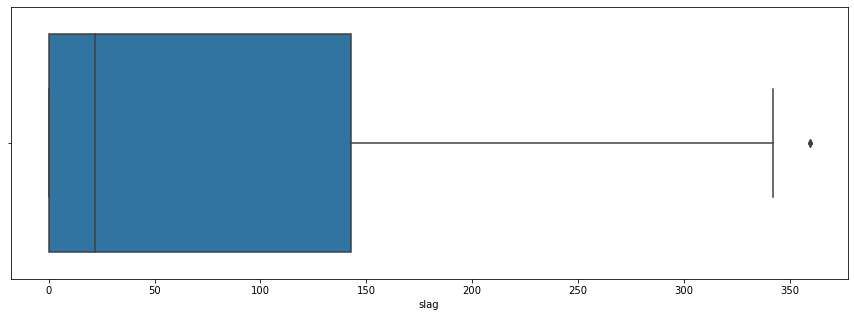

In [346]:
plt.figure(figsize=(15,5))
sns.boxplot(data['slag'])
plt.show()

In [347]:
data[data['slag']==0]['slag'].value_counts()

0.0    471
Name: slag, dtype: int64

In [348]:
# First quartile (Q1) 
Q1 = np.percentile(data['slag'], 25) 
  
# Third quartile (Q3) 
Q3 = np.percentile(data['slag'], 75) 
  
# Interquaritle range (IQR) 
IQR = Q3 - Q1 

MaxBox=Q3 + (IQR*1.5)




#data[data['slag']>330]=data['slag'].

In [349]:
MaxBox

357.375

In [350]:
data2[data2['slag']>MaxBox]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


In [351]:
#Only 2 records which are outliers. This will not affect the 

In [352]:
data2.loc[data2.slag > MaxBox, 'slag'] = data['slag'].median()
#replace the outliers with the median from the boxplot. See calculation above.

In [353]:
data2[data2['slag']>MaxBox]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


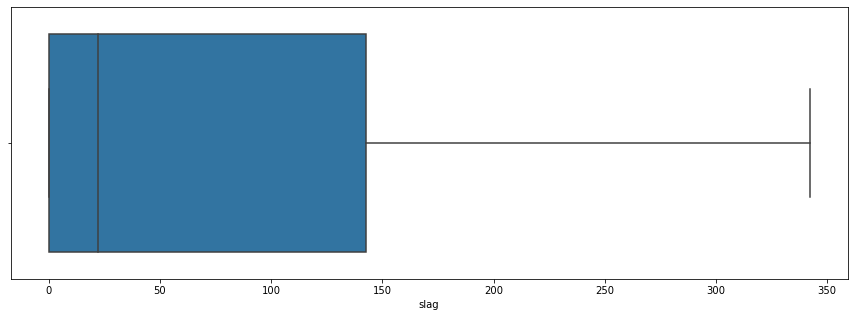

In [354]:
plt.figure(figsize=(15,5))
sns.boxplot(data2['slag'])
plt.show()

In [355]:
#The outliers are gone now.

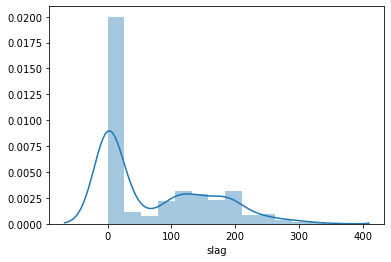

In [356]:
sns.distplot(data2.slag);

In [357]:
#skewed to the right

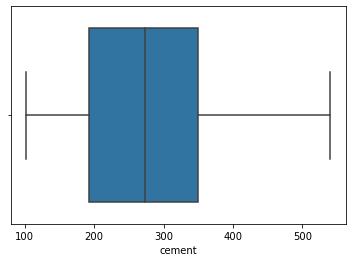

In [358]:
sns.boxplot(data['cement'])
plt.show()

In [359]:
#No outliers identified. 

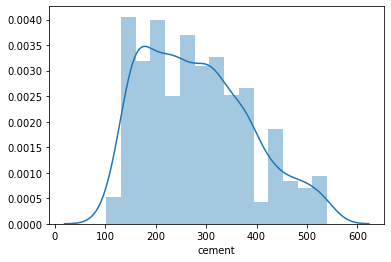

In [360]:
sns.distplot(data2.cement);

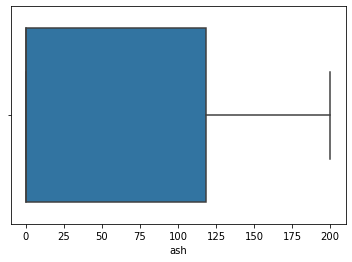

In [361]:
sns.boxplot(data['ash'])
plt.show()

In [362]:
#No outliers available. It seems to be skewed to the right. 

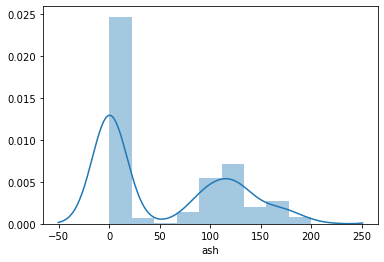

In [363]:
sns.distplot(data2.ash);

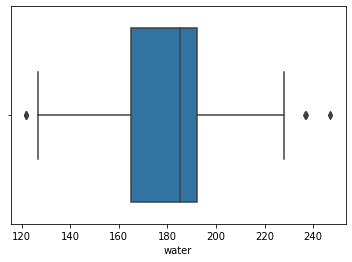

In [364]:
sns.boxplot(data['water'])
plt.show()

In [365]:
#There are a number of outliers. Let's see if the numbers are high.

In [366]:
# First quartile (Q1) 
Q1 = np.percentile(data['water'], 25) 
  
# Third quartile (Q3) 
Q3 = np.percentile(data['water'], 75) 
  
# Interquaritle range (IQR) 
IQR = Q3 - Q1 

MinBox=Q1 - (IQR*1.5)
MaxBox=Q3 + (IQR*1.5)

print("Minimum Boxplot:",MinBox)
print("Maximum Boxplot:",MaxBox)

Minimum Boxplot: 124.25000000000001
Maximum Boxplot: 232.64999999999998


In [367]:
data[data['water']<MinBox]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


In [368]:
#The number of records are not high, only 5 records. We are going to replace these with the median

In [369]:
data[data['water']>MaxBox]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23


In [370]:
#The number of records are not high, only 4 records. We are going to replace these with the median

In [371]:
data2.loc[data2.water > MaxBox, 'water'] = data.water.median()
data2.loc[data2.water < MinBox, 'water'] = data.water.median()
#replace the outliers with the maximum/minimum from the boxplot. See calculation above.

In [372]:
data2.loc[66,:]
#Check if it does what it should do

cement          237.00
slag             92.00
ash              71.00
water           185.00
superplastic      6.00
coarseagg       853.00
fineagg         695.00
age              28.00
strength         28.63
Name: 66, dtype: float64

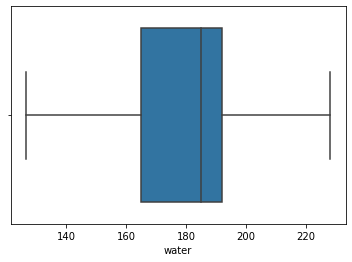

In [373]:
sns.boxplot(data2['water'])
plt.show()

In [374]:
#the outliers are now gone

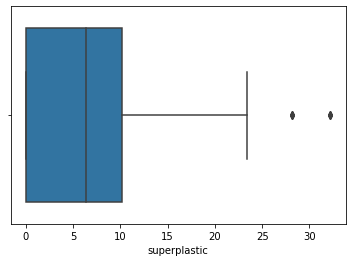

In [375]:
sns.boxplot(data['superplastic'])
plt.show()

In [376]:
# First quartile (Q1) 
Q1 = np.percentile(data['superplastic'], 25) 
  
# Third quartile (Q3) 
Q3 = np.percentile(data['superplastic'], 75) 
  
# Interquaritle range (IQR) 
IQR = Q3 - Q1 

MinBox=Q1 - (IQR*1.5)
MaxBox=Q3 + (IQR*1.5)

print("Minimum Boxplot:",MinBox)
print("Maximum Boxplot:",MaxBox)

Minimum Boxplot: -15.299999999999999
Maximum Boxplot: 25.5


In [377]:
data2[data2['superplastic']>MaxBox]=data['superplastic'].median()

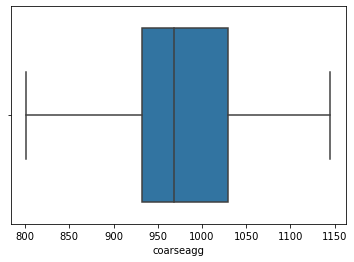

In [378]:
sns.boxplot(data['coarseagg'])
plt.show()

In [379]:
#no outliers. Data doesn't seem skewed.

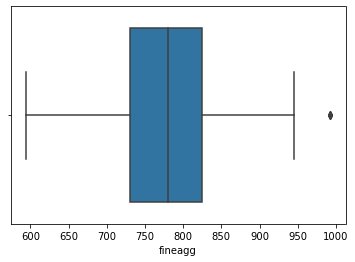

In [380]:
sns.boxplot(data['fineagg'])
plt.show()

In [381]:
# First quartile (Q1) 
Q1 = np.percentile(data['fineagg'], 25) 
  
# Third quartile (Q3) 
Q3 = np.percentile(data['fineagg'], 75) 
  
# Interquaritle range (IQR) 
IQR = Q3 - Q1 

MinBox=Q1 - (IQR*1.5)
MaxBox=Q3 + (IQR*1.5)

print("Minimum Boxplot:",MinBox)
print("Maximum Boxplot:",MaxBox)

Minimum Boxplot: 591.3749999999998
Maximum Boxplot: 963.575


In [382]:
data[data['fineagg']>MaxBox]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


In [383]:
data2.loc[data2.fineagg > MaxBox, 'fineagg'] = data['fineagg'].median()
#replace the outliers with the maximum/minimum from the boxplot. See calculation above.

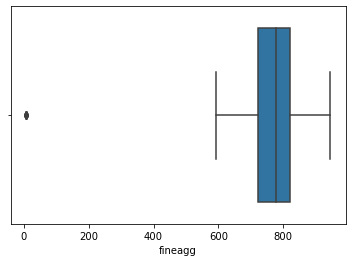

In [384]:
sns.boxplot(data2['fineagg'])
plt.show()

In [385]:
data2.loc[129,]

cement          375.0
slag             93.8
ash               0.0
water           126.6
superplastic     23.4
coarseagg       852.1
fineagg         779.5
age              91.0
strength         62.5
Name: 129, dtype: float64

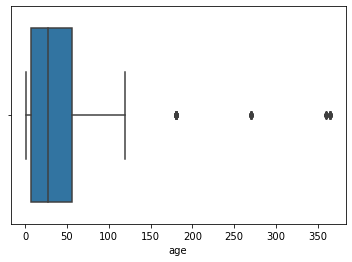

In [386]:
sns.boxplot(data['age'])
plt.show()

In [387]:
# First quartile (Q1) 
Q1 = np.percentile(data['age'], 25) 
  
# Third quartile (Q3) 
Q3 = np.percentile(data['age'], 75) 
  
# Interquaritle range (IQR) 
IQR = Q3 - Q1 

MinBox=Q1 - (IQR*1.5)
MaxBox=Q3 + (IQR*1.5)

print("Minimum Boxplot:",MinBox)
print("Maximum Boxplot:",MaxBox)

Minimum Boxplot: -66.5
Maximum Boxplot: 129.5


In [388]:
#Especially 'age' seems to be highly skewed. Therefore, the ages used for concrete calculations are not symmetric.
data[data['age']>150].count()

cement          59
slag            59
ash             59
water           59
superplastic    59
coarseagg       59
fineagg         59
age             59
strength        59
dtype: int64

In [389]:
data2.loc[data2.fineagg > MaxBox, 'age'] = data['age'].median()

2 Bi-variate / Multivariate analysis

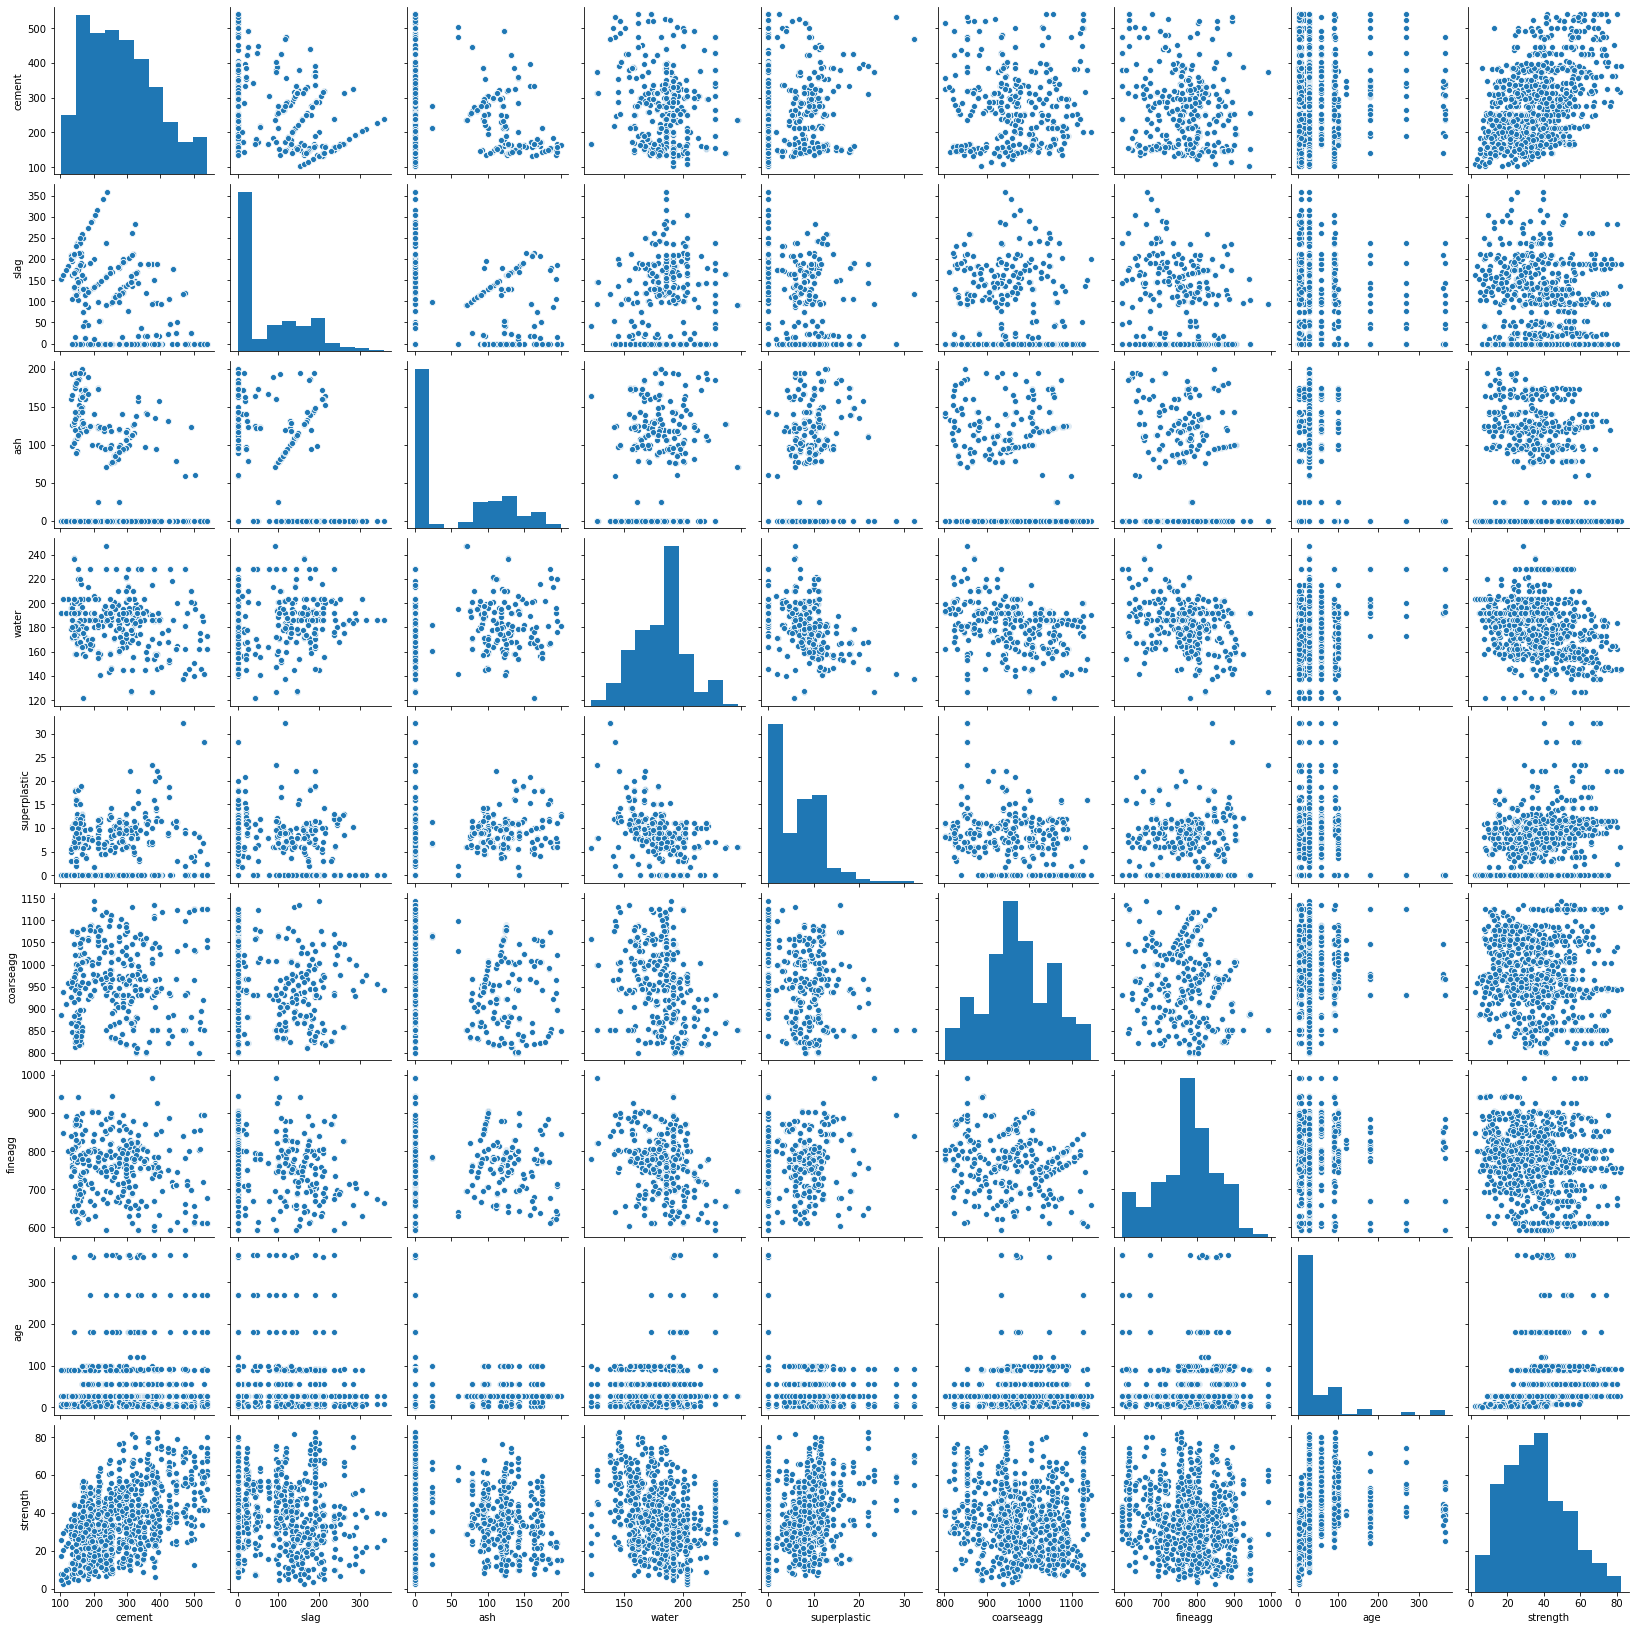

In [390]:
sns.pairplot(data)
#When looking at the pairplots, there doesn't seem to be a real correlation between the fields.

In [391]:
data.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [392]:
#When looking at this data. The only element that seems to effect the strength are cement and superplastic and a bit age.
#it seems that the independent variables are not correlated to each other.

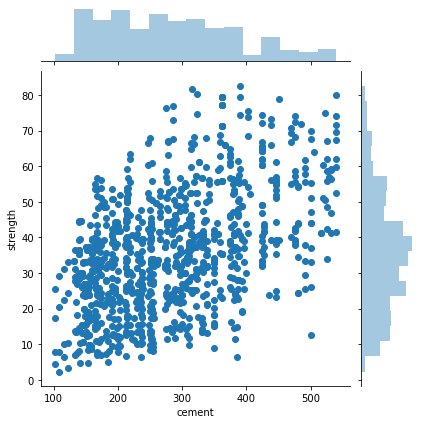

In [393]:
sns.jointplot(data.cement, data.strength);
#As pointed out before, there seems to be a bit of a correlation. But it is not really strong.

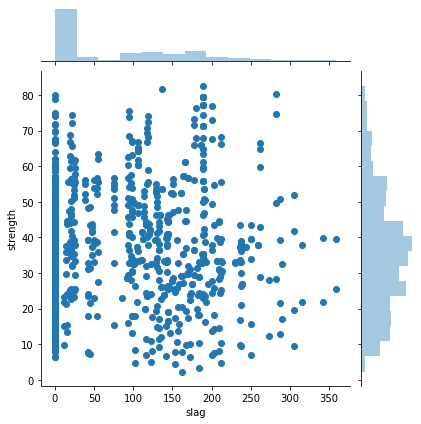

In [394]:
sns.jointplot(data.slag, data.strength);
#There seems to be no correlation

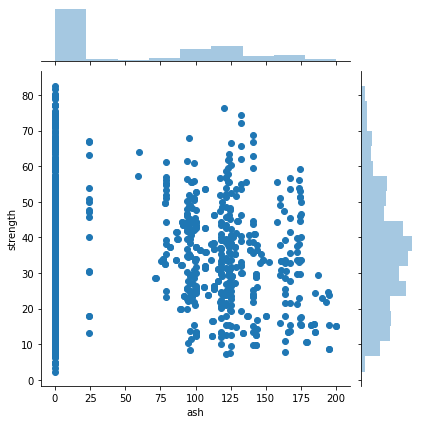

In [395]:
sns.jointplot(data.ash, data.strength);
#No correlation

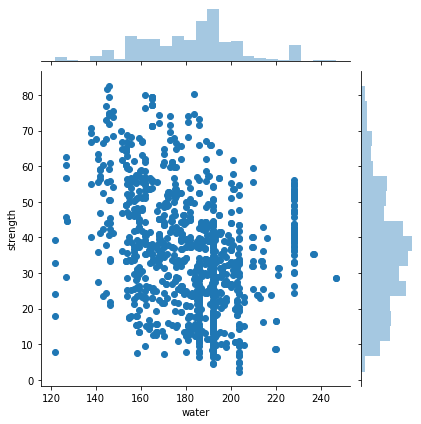

In [396]:
sns.jointplot(data.water, data.strength);
#No correlation

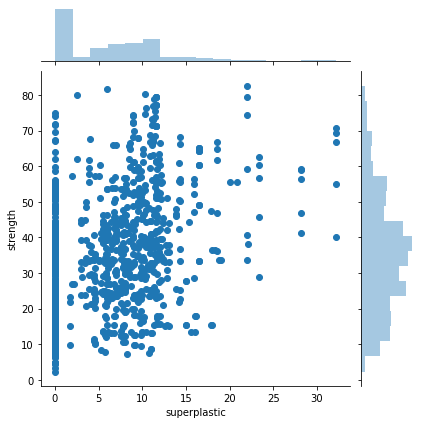

In [397]:
sns.jointplot(data.superplastic, data.strength);
#it seems there is a bit of correlation between superplastic and strength. But it seems weak.

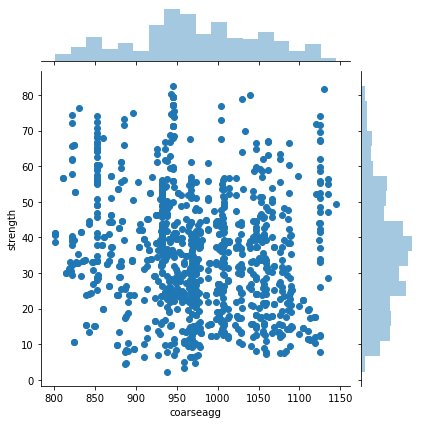

In [398]:
sns.jointplot(data.coarseagg, data.strength);
#No correlation

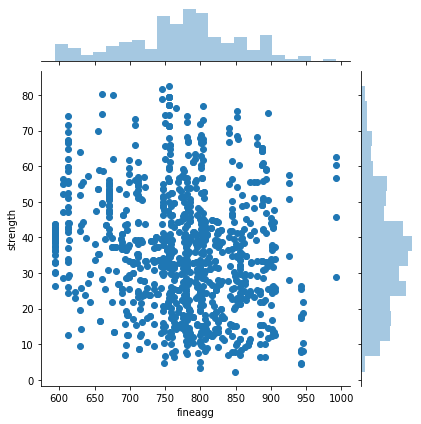

In [399]:
sns.jointplot(data.fineagg, data.strength);
#No correlation

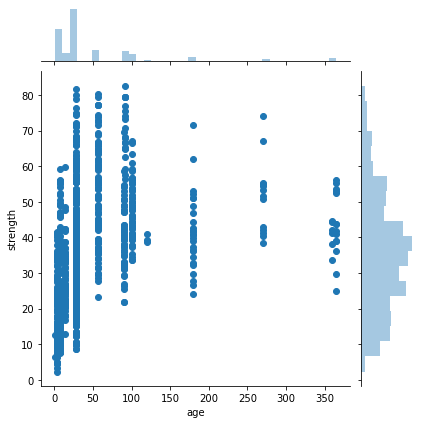

In [400]:
sns.jointplot(data.age, data.strength);
#If you look at this graphic, the correlation is not really there.

3 Feature engineering techniques

Identify opportunities

In [401]:
#As said there are no independent variables that are dependent on each other. So I am not going to drop anything.Furthermore, 
#I don't see an opportunity to create a new variable that is valuable.

Get data model ready

In [402]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,276.374175,105.625887,6.40,190.300,266.00,349.0000,540.0
slag,1030.0,72.733883,85.429530,0.00,0.000,21.00,142.7250,342.1
ash,1030.0,54.250485,63.947401,0.00,0.000,0.00,118.3000,200.1
water,1030.0,180.357961,26.537362,6.40,164.900,185.00,192.0000,228.0
superplastic,1030.0,5.973592,5.477165,0.00,0.000,6.40,10.0750,23.4
coarseagg,1030.0,964.708252,122.125573,6.40,932.000,968.00,1029.4000,1145.0
fineagg,1030.0,764.189709,108.327800,6.40,722.950,778.45,821.0000,945.0
age,1030.0,27.790291,2.118983,6.40,28.000,28.00,28.0000,28.0
strength,1030.0,35.331942,16.794865,2.33,23.275,33.78,45.3525,82.6



# Get Data model ready

In [403]:
#Import all the necessary modules
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import tree
from os import system
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [404]:
#I have created a data2 set with adjusted outliers with the median. I didn't get better results. Therefore, I am 
#going to use data instead of data2.

In [405]:
X = data.drop(["strength"], axis=1)
y = data.pop("strength")

In [406]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [407]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=.20, random_state=1)

In [408]:
X_train

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
842,332.5,142.5,0.0,228.0,0.0,932.0,594.0,7
988,238.0,0.0,0.0,185.0,0.0,1118.0,789.0,28
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91
456,288.0,192.0,0.0,192.0,0.0,932.0,717.8,90
666,310.0,0.0,0.0,192.0,0.0,970.0,850.0,28
...,...,...,...,...,...,...,...,...
25,310.0,143.0,0.0,168.0,10.0,914.0,804.0,28
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180
853,132.0,206.5,160.9,178.9,5.5,866.9,735.6,28
702,139.9,132.6,103.3,200.3,7.4,916.0,753.4,28


In [409]:
X_validation

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
552,376.0,0.0,0.0,214.6,0.0,1003.5,762.4,28
247,213.7,0.0,174.7,154.8,10.2,1053.5,776.4,28
334,323.7,282.8,0.0,183.8,10.3,942.7,659.9,3
616,388.6,97.1,0.0,157.9,12.1,852.1,925.7,56
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56
...,...,...,...,...,...,...,...,...
987,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,28
472,288.0,192.0,0.0,192.0,0.0,932.0,717.8,28
848,252.3,0.0,98.8,146.3,14.2,987.8,889.0,56
230,108.3,162.4,0.0,203.5,0.0,938.2,849.0,3


In [410]:
X_test

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
339,236.0,157.0,0.0,192.0,0.0,972.6,749.1,90
244,393.0,0.0,0.0,192.0,0.0,940.0,758.0,90
882,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,14
567,155.0,183.0,0.0,193.0,9.0,1047.0,697.0,28
923,310.0,0.0,0.0,192.0,0.0,970.0,850.0,7
...,...,...,...,...,...,...,...,...
1018,147.0,115.0,89.0,202.0,9.0,860.0,829.0,28
1015,298.0,0.0,107.0,186.0,6.0,879.0,815.0,28
341,181.4,0.0,167.0,169.6,7.6,1055.6,777.8,100
750,333.0,17.5,163.0,167.0,17.9,996.0,652.0,28


In [411]:
#I am going to use the linear regression mode, BaggingRegressor and GradientBoostingRegressor.
#In the next steps I am first running the models as usual. After that I use Cross Validation and GridSearchCV/RandomizedSearchCV

In [412]:
seed = 6
#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = model_selection.KFold(n_splits=20)

# Linear Regression

In [413]:
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(X_train,y_train)
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)
scoreLR_train=r2_score(y_train,train_prediction)
scoreLR_test=r2_score(y_test,test_prediction)
print("R2 score train set:",scoreLR_train)
print("R2 score test set:",scoreLR_test)

R2 score train set: 0.6041268881195911
R2 score test set: 0.633576947356065


In [414]:
num_folds = 50
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
modelLR = LinearRegression()
resultsLR = cross_val_score(modelLR, X_train, y_train, cv=kfold, scoring='r2')
print(resultsLR)
print("R2: %.3f%% (%.3f%%)" % (resultsLR.mean(), resultsLR.std()))

[ 0.7994295   0.65054396  0.59062279  0.79669013  0.78986565  0.63970059
  0.31123784  0.74845564  0.71000408  0.42347136  0.82195003  0.48164748
  0.6375525   0.29646805  0.34537888  0.34730645  0.71400097  0.03543449
  0.67979659  0.50467962  0.65253737  0.43278524  0.6517864   0.39398759
  0.69547239  0.6451293   0.36068818  0.64137129  0.38282791  0.33555205
  0.48490303  0.78734988  0.64024201  0.49458229 -1.87480257  0.58280125
  0.51754591  0.64379461  0.65055662  0.10674306 -0.11435252  0.84283662
  0.64116706  0.08027971  0.79636403  0.60719571  0.73243825  0.51131417
  0.3959495  -1.4461576 ]
R2: 0.452% (0.483%)


In [415]:
resultsDf = pd.DataFrame({'Method':['Linear Regression'], 'R2 Test': scoreLR_test  ,'R2 CV': resultsLR.mean(), 'R2 GridsearchCV Best CV':0, 'R2 Validation Set GridSearchCV' :0, 'R2 Test Best Params':0  }                )
resultsDf = resultsDf[['Method', 'R2 Test','R2 CV','R2 GridsearchCV Best CV','R2 Validation Set GridSearchCV','R2 Test Best Params']]
resultsDf

,Method,R2 Test,R2 CV,R2 GridsearchCV Best CV,R2 Validation Set GridSearchCV,R2 Test Best Params
0,Linear Regression,0.633577,0.451943,0,0,0


In [416]:
modelLR.get_params() #Check the used paramets. Can be used later on for the GridSearchCV/RandomizedSearchCV

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

# Bagging

In [417]:
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingRegressor
modelBR = BaggingRegressor()
modelBR.fit(X_train,y_train)
train_prediction=modelBR.predict(X_train)
test_prediction=modelBR.predict(X_test)
scoreB_train=r2_score(y_train,train_prediction)
scoreB_test=r2_score(y_test,test_prediction)
print("R2 score train set:",scoreB_train)
print("R2 score test set:",scoreB_test)

R2 score train set: 0.9755320619169363
R2 score test set: 0.8679932190410272


In [418]:
from sklearn.ensemble import BaggingRegressor
num_folds = 50
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
modelBR = BaggingRegressor()
resultsBR = cross_val_score(modelBR, X_train, y_train, cv=kfold,scoring='r2')
print(resultsBR)
print("R2: %.3f%% (%.3f%%)" % (resultsBR.mean(), resultsBR.std()))

[0.9759557  0.88977811 0.82567334 0.91669432 0.9535674  0.92807779
 0.81748938 0.94839271 0.86512863 0.91561837 0.67786041 0.88177035
 0.95241936 0.85545468 0.96176155 0.87056956 0.8585649  0.84585386
 0.92869936 0.87168916 0.94228015 0.70223567 0.93873413 0.81798663
 0.91675749 0.76060589 0.93640829 0.91834591 0.8446503  0.52441764
 0.71392541 0.95049343 0.91912041 0.80266506 0.72685495 0.82092224
 0.91442505 0.8929189  0.71080671 0.89764722 0.86268794 0.930966
 0.89457356 0.33391593 0.93753612 0.73220801 0.95128714 0.82040741
 0.84324826 0.67363924]
R2: 0.847% (0.119%)


In [419]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'R2 Test': scoreB_test  ,'R2 CV': resultsBR.mean(), 'R2 GridsearchCV Best CV':0, 'R2 Validation Set GridSearchCV' :0,'R2 Test Best Params':0   }                )
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'R2 Test','R2 CV','R2 GridsearchCV Best CV','R2 Validation Set GridSearchCV','R2 Test Best Params']]
resultsDf

,Method,R2 Test,R2 CV,R2 GridsearchCV Best CV,R2 Validation Set GridSearchCV,R2 Test Best Params
0,Linear Regression,0.633577,0.451943,0,0,0
0,Bagging,0.867993,0.847474,0,0,0


In [420]:
modelBR.get_params() #Check the used paramets. Can be used later on for the GridSearchCV/RandomizedSearchCV

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# GradientBoosting

In [421]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
modelGBR = GradientBoostingRegressor()
modelGBR.fit(X_train,y_train)
train_prediction=modelGBR.predict(X_train)
test_prediction=modelGBR.predict(X_test)
scoreGBR_train=r2_score(y_train,train_prediction)
scoreGBR_test=r2_score(y_test,test_prediction)
print("R2 score train set:",scoreGBR_train)
print("R2 score test set:",scoreGBR_test)

R2 score train set: 0.9571112434624862
R2 score test set: 0.8991570040813718


In [422]:
from sklearn.ensemble import GradientBoostingRegressor
num_folds = 50
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = GradientBoostingRegressor()
resultsGBR = cross_val_score(model, X_train, y_train, cv=kfold,scoring='r2')
print(resultsGBR)
print("R2: %.3f%% (%.3f%%)" % (resultsGBR.mean(), resultsGBR.std()))

[0.95409684 0.93356576 0.91068463 0.93169274 0.96395248 0.90309887
 0.92760617 0.96967273 0.89812147 0.88941892 0.77287085 0.61779933
 0.9785079  0.85196034 0.94043842 0.87076793 0.88382522 0.80189307
 0.9231264  0.90261678 0.9587039  0.74068194 0.90889997 0.87863491
 0.96161826 0.93030295 0.95179335 0.92310589 0.87501423 0.67186723
 0.77691277 0.95438888 0.97343634 0.88679548 0.77039916 0.78228324
 0.95428655 0.86385113 0.87413948 0.85505637 0.92714544 0.93398283
 0.93621008 0.49822362 0.90620635 0.82565785 0.94907663 0.91808044
 0.8299187  0.5164699 ]
R2: 0.871% (0.106%)


In [423]:
tempResultsDf = pd.DataFrame({'Method':['GradientBoosting'], 'R2 Test': scoreGBR_test  ,'R2 CV': resultsGBR.mean(), 'R2 GridsearchCV Best CV':0, 'R2 Validation Set GridSearchCV' :0, 'R2 Test Best Params': 0  }                )
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'R2 Test','R2 CV','R2 GridsearchCV Best CV','R2 Validation Set GridSearchCV','R2 Test Best Params']]
resultsDf

,Method,R2 Test,R2 CV,R2 GridsearchCV Best CV,R2 Validation Set GridSearchCV,R2 Test Best Params
0,Linear Regression,0.633577,0.451943,0,0,0
0,Bagging,0.867993,0.847474,0,0,0
0,GradientBoosting,0.899157,0.871177,0,0,0


In [424]:
#When looking at the models, the GradientBoosting method seems to be the best method.

In [425]:
modelGBR.get_params() #Check the used paramets. Can be used later on for the GridSearchCV/RandomizedSearchCV

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# LinearRegression SearchCV

In [426]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler


pipe_lr = Pipeline([ ('lr', LinearRegression())]) 

param_grid = {'lr__fit_intercept':[True,False],'lr__normalize':[True,False],'lr__copy_X':[True,False]} 

gridLR = GridSearchCV( pipe_lr , param_grid = param_grid, cv = 5,scoring='r2') 

gridLR.fit( X_train, y_train) 

print(" Best cross-validation R2: {:.2f}". format( gridLR.best_score_)) 
print(" Best parameters: ", gridLR.best_params_) 
print(" Validation set R2: {:.2f}". format( gridLR.score( X_validation, y_validation)))

 Best cross-validation R2: 0.57
 Best parameters:  {'lr__copy_X': True, 'lr__fit_intercept': True, 'lr__normalize': True}
 Validation set R2: 0.58


In [427]:
resultsDf

,Method,R2 Test,R2 CV,R2 GridsearchCV Best CV,R2 Validation Set GridSearchCV,R2 Test Best Params
0,Linear Regression,0.633577,0.451943,0,0,0
0,Bagging,0.867993,0.847474,0,0,0
0,GradientBoosting,0.899157,0.871177,0,0,0


In [428]:
resultsDf.iloc[0,3]=format( gridLR.best_score_)
resultsDf.iloc[0,4]=format( gridLR.score( X_validation, y_validation))
resultsDf

,Method,R2 Test,R2 CV,R2 GridsearchCV Best CV,R2 Validation Set GridSearchCV,R2 Test Best Params
0,Linear Regression,0.633577,0.451943,0.5728436852983243,0.583044506407213,0
0,Bagging,0.867993,0.847474,0,0,0
0,GradientBoosting,0.899157,0.871177,0,0,0


In [429]:
#Run the LinearRegressor with the best parameters
modelLR = LinearRegression(copy_X= True, fit_intercept=True, normalize=True)
modelLR.fit(X_train,y_train)
trainLR_prediction=modelLR.predict(X_train)
testLR_prediction=modelLR.predict(X_test)
scoreLR_train=r2_score(y_train,trainLR_prediction)
scoreLR_test=r2_score(y_test,testLR_prediction)
resultsDf.iloc[0,5]=format( scoreLR_test)
resultsDf

,Method,R2 Test,R2 CV,R2 GridsearchCV Best CV,R2 Validation Set GridSearchCV,R2 Test Best Params
0,Linear Regression,0.633577,0.451943,0.5728436852983243,0.583044506407213,0.6335769473560657
0,Bagging,0.867993,0.847474,0,0,0
0,GradientBoosting,0.899157,0.871177,0,0,0


# Bagging SearchCV

In [430]:
#parameters used for the standard cross validation.
{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [431]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline 

#pipe_br = Pipeline([('br', BaggingRegressor())]) 

br = BaggingRegressor(n_estimators=10)
#br.fit(X_train,y_train)

param_grid = {'base_estimator':[DecisionTreeRegressor(),LinearRegression()] , 'max_samples':[0.8,0.9,1.0,1.1,1.2],'bootstrap':[True,False], 'max_features':[0.8,0.9,1.0,1.1,1.2]} 

gridB = GridSearchCV( br , param_grid = param_grid, cv = 10,scoring='r2') 

gridB.fit( X_train, y_train) 

print(" Best cross-validation R2: {:.2f}". format( gridB.best_score_)) 
print(" Best parameters: ", gridB.best_params_) 
print(" Test set R2: {:.2f}". format( gridB.score( X_test, y_test)))
print(" Validation set R2: {:.2f}". format( gridB.score( X_validation, y_validation)))


 Best cross-validation R2: 0.88
 Best parameters:  {'base_estimator': DecisionTreeRegressor(), 'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.9}
 Test set R2: 0.87
 Validation set R2: 0.85


In [432]:
resultsDf

,Method,R2 Test,R2 CV,R2 GridsearchCV Best CV,R2 Validation Set GridSearchCV,R2 Test Best Params
0,Linear Regression,0.633577,0.451943,0.5728436852983243,0.583044506407213,0.6335769473560657
0,Bagging,0.867993,0.847474,0,0,0
0,GradientBoosting,0.899157,0.871177,0,0,0


In [433]:
resultsDf.iloc[1,3]=format( gridB.best_score_)
resultsDf.iloc[1,4]=format( gridB.score( X_validation, y_validation))
resultsDf

,Method,R2 Test,R2 CV,R2 GridsearchCV Best CV,R2 Validation Set GridSearchCV,R2 Test Best Params
0,Linear Regression,0.633577,0.451943,0.5728436852983243,0.583044506407213,0.6335769473560657
0,Bagging,0.867993,0.847474,0.8752059013371687,0.8470402684914328,0
0,GradientBoosting,0.899157,0.871177,0,0,0


In [434]:
#Run the BaggingRegressor with the best parameters
modelB = BaggingRegressor(base_estimator= DecisionTreeRegressor(), bootstrap= True, max_features= 1.0, max_samples= 1.0)
modelB.fit(X_train,y_train)
trainB_prediction=modelB.predict(X_train)
testB_prediction=modelB.predict(X_test)
scoreB_train=r2_score(y_train,trainB_prediction)
scoreB_test=r2_score(y_test,testB_prediction)
resultsDf.iloc[1,5]=format( scoreB_test)
resultsDf

,Method,R2 Test,R2 CV,R2 GridsearchCV Best CV,R2 Validation Set GridSearchCV,R2 Test Best Params
0,Linear Regression,0.633577,0.451943,0.5728436852983243,0.583044506407213,0.6335769473560657
0,Bagging,0.867993,0.847474,0.8752059013371687,0.8470402684914328,0.8762170079148183
0,GradientBoosting,0.899157,0.871177,0,0,0


# Boosting SearchCV

In [435]:
#These are the params used for the standard Boosting
{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [436]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline 



gbr = GradientBoostingRegressor()

param_grid = {'min_samples_leaf':[1,2,3], 'criterion':['friedman_mse', 'mse', 'mae'], 'min_samples_split':[1,2,3],'max_depth':[2,3,4],'learning_rate':[0.1,0.2]} 

gridBoost = RandomizedSearchCV( gbr , param_distributions= param_grid, cv = 50,scoring='r2') 

gridBoost.fit( X_train, y_train) 

print(" Best cross-validation R2: {:.2f}". format( gridBoost.best_score_)) 
print(" Best parameters: ", gridBoost.best_params_) 
print(" Validation set R2: {:.2f}". format( gridBoost.score( X_validation, y_validation)))

 Best cross-validation R2: 0.88
 Best parameters:  {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.2, 'criterion': 'mse'}
 Validation set R2: 0.90


In [437]:
resultsDf.iloc[2,3]=format( gridBoost.best_score_)
resultsDf.iloc[2,4]=format( gridBoost.score( X_validation, y_validation))
resultsDf

,Method,R2 Test,R2 CV,R2 GridsearchCV Best CV,R2 Validation Set GridSearchCV,R2 Test Best Params
0,Linear Regression,0.633577,0.451943,0.5728436852983243,0.583044506407213,0.6335769473560657
0,Bagging,0.867993,0.847474,0.8752059013371687,0.8470402684914328,0.8762170079148183
0,GradientBoosting,0.899157,0.871177,0.8818425246359888,0.8957466232030366,0


In [438]:
#For Linear Regression and Bagging the results are slightly better than the regular cross validation. For GradientBoosting 
#it is an improvement of 2%. 

In [439]:
#Run the GradientBoostingRegressor with the best parameters
modelGBR = GradientBoostingRegressor(min_samples_split=4, max_depth=4, learning_rate=0.2, criterion='friedman_mse')
modelGBR.fit(X_train,y_train)
trainGBR_prediction=modelGBR.predict(X_train)
testGBR_prediction=modelGBR.predict(X_test)
scoreGBR_train=r2_score(y_train,trainGBR_prediction)
scoreGBR_test=r2_score(y_test,testGBR_prediction)
resultsDf.iloc[2,5]=format( scoreGBR_test)
resultsDf

,Method,R2 Test,R2 CV,R2 GridsearchCV Best CV,R2 Validation Set GridSearchCV,R2 Test Best Params
0,Linear Regression,0.633577,0.451943,0.5728436852983243,0.583044506407213,0.6335769473560657
0,Bagging,0.867993,0.847474,0.8752059013371687,0.8470402684914328,0.8762170079148183
0,GradientBoosting,0.899157,0.871177,0.8818425246359888,0.8957466232030366,0.9100725753191584


In [440]:
#The GridSearchCV/RandomizedSearchCV results are better than the CV results for most Methods (apart from GradientBoosting). 
#But the test set with the best parameters shows a better result for Bagging and GradientBoosting. LinearRegression stays 
#the same, but the number of parameters is low. Therefore this is not strange.